In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Read data
df_census = pd.read_csv('Resources/Census.csv')
df_census

,Year,State,Home Value <$50k (%),"Home Value $50k-$99,999k (%)","Home Value $100k-$149,999k (%)","Home Value $150k-$199,999k (%)","Home Value $200k-$299,999k (%)","Home Value $100k-$299,999 (%)","Home Value $300k-$499,999k (%)",Home Value $500k+ (%),...,"Income $10k-$24,999 (%)","Income $25k-$34,999 (%)","Income $35k-$49,999 (%)","Income $50k-$74,999 (%)","Income $75k-$99,999 (%)","Income $100k-$149,999 (%)",Income $150k+ (%),Median Income ($)(1000X),Median Housing Cost (monthly) ($),Median Real Estate Taxes ($)
0,2010,Alabama,9.1,23.6,20.3,17.8,16.8,NaN,8.7,3.7,...,10.4,8.7,15.5,21.7,15.6,15.6,8.7,61.964,1130,568.0
1,2010,Alaska,2.0,2.9,9.6,15.6,35.2,NaN,26.5,8.1,...,4.0,5.1,8.4,17.8,17.0,27.3,19.1,94.747,1772,3177.0
2,2010,Arizona,4.0,13.4,20.5,19.5,21.4,NaN,14.4,6.8,...,8.8,8.2,14.1,22.6,16.2,17.2,10.2,66.539,1442,1489.0
3,2010,Arkansas,12.0,27.0,23.9,16.2,12.2,NaN,6.4,2.1,...,10.9,10.6,16.8,22.8,15.1,14.1,7.1,59.393,987,703.0
4,2010,California,1.5,3.4,6.0,8.6,17.4,NaN,29.1,34.0,...,5.9,5.2,10.0,17.7,15.9,22.1,21.2,88.444,2242,3284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2018,Florida,2.6,6.4,NaN,NaN,NaN,55.1,24.6,NaN,...,7.3,6.4,11.2,18.5,15.6,19.8,18.4,80.372,1471,2151.0
464,2018,Massachusetts,1.0,0.8,NaN,NaN,NaN,26.7,36.2,NaN,...,3.1,3.1,5.5,13.0,13.0,23.6,37.3,121.565,2207,4801.0
465,2018,District of Columbia,0.8,0.6,NaN,NaN,NaN,8.9,27.1,NaN,...,2.8,1.9,2.9,9.0,10.2,20.3,50.6,151.147,2506,3691.0
466,2018,Utah,1.9,1.2,NaN,NaN,NaN,44.5,37.5,NaN,...,3.7,4.3,8.1,19.1,18.3,26.2,19.3,93.060,1531,1788.0


In [4]:
# Filter data to just get information about California
ca_housing_df = df_census[df_census['State'] == 'California']
ca_housing_df

,Year,State,Home Value <$50k (%),"Home Value $50k-$99,999k (%)","Home Value $100k-$149,999k (%)","Home Value $150k-$199,999k (%)","Home Value $200k-$299,999k (%)","Home Value $100k-$299,999 (%)","Home Value $300k-$499,999k (%)",Home Value $500k+ (%),...,"Income $10k-$24,999 (%)","Income $25k-$34,999 (%)","Income $35k-$49,999 (%)","Income $50k-$74,999 (%)","Income $75k-$99,999 (%)","Income $100k-$149,999 (%)",Income $150k+ (%),Median Income ($)(1000X),Median Housing Cost (monthly) ($),Median Real Estate Taxes ($)
4,2010,California,1.5,3.4,6.0,8.6,17.4,NaN,29.1,34.0,...,5.9,5.2,10.0,17.7,15.9,22.1,21.2,88.444,2242,3284.0
56,2011,California,1.6,3.8,7.0,9.0,17.9,NaN,28.5,32.2,...,6.0,5.3,9.8,17.3,15.3,21.6,22.3,89.279,2182,3291.0
108,2012,California,1.7,4.1,7.2,9.3,18.0,NaN,28.5,31.3,...,5.7,5.2,9.6,17.1,15.2,21.8,23.2,91.024,2119,3336.0
160,2013,California,2.8,3.2,5.7,8.0,16.3,NaN,29.2,34.9,...,5.6,5.0,9.1,16.8,14.8,21.7,25.0,93.538,2059,3412.0
212,2014,California,2.7,2.1,4.1,6.2,14.7,NaN,30.0,40.2,...,5.4,5.0,8.5,16.0,14.8,21.8,26.4,96.305,2068,3548.0
264,2015,California,1.1,1.7,NaN,NaN,NaN,22.2,30.5,NaN,...,5.1,4.6,8.2,15.4,14.5,22.2,28.0,100.223,2123,NaN
316,2016,California,1.1,1.4,NaN,NaN,NaN,19.4,29.4,NaN,...,4.7,4.2,7.8,14.8,14.1,21.8,30.6,103.266,2188,NaN
368,2017,California,1.0,1.1,NaN,NaN,NaN,16.6,28.5,NaN,...,4.5,3.9,7.2,13.8,13.6,22.6,32.5,108.609,2269,4174.0
425,2018,California,1.0,1.0,NaN,NaN,NaN,14.1,27.1,NaN,...,4.1,3.7,6.6,13.3,13.2,22.1,34.9,113.027,2345,4479.0


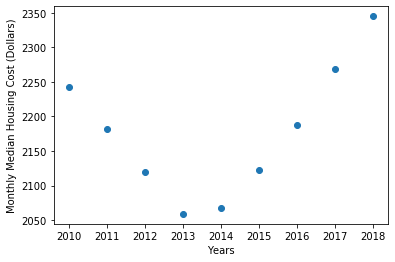

In [5]:
# Visually inspect relationship between Median Housing Cost and Year
x = ca_housing_df['Year']
y = ca_housing_df['Median Housing Cost (monthly) ($)']
plt.scatter(x, y)
plt.xlabel('Years')
plt.ylabel('Monthly Median Housing Cost (Dollars)')
plt.show()

In [6]:
# Set independent variable
X = ca_housing_df.Year.values.reshape(-1,1)
X

array([[2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018]])

In [9]:
# Set dependent variable
y1 = ca_housing_df['Median Housing Cost (monthly) ($)']

In [10]:
# Create model and fit
model = LinearRegression()
model.fit(X,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

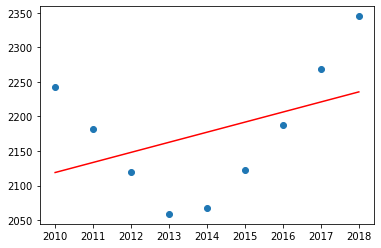

In [11]:
# Predict using the model
y_pred = model.predict(X)

# Visualize the regression line
plt.scatter(X,y1)
plt.plot(X, y_pred, color='red')
plt.show()

In [12]:
# Find the equation for the regression line
print(model.coef_)
print(model.intercept_)

[14.58333333]
-27193.61111111112


In [13]:
# Predict the cost of housing in 2030
14.583333333*2030 - 27193.611111111

2410.555554879